<a href="https://colab.research.google.com/github/Son-github/MachineLearning_Study/blob/main/chapter4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight', 'Length', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler #사이킷런에서 확률적 하강법을 제공하는 대표적인 분류용 클래스
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) #loss는 손실 함수의 종류를 지정, max_iter은 에포크 횟수를 지정. 다중 분류의 경우 loss='log_loss'로 지정하면 이진 분류 모델로 만듬(이러한 방식을 OvR(One versus Rest)라고 부름)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7478991596638656
0.825


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target) #모델을 이어서 훈련할 때 쓰는 함수
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7310924369747899
0.7


In [ ]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target) #train_target에 있는 7개 생선의 목록을 만듬

In [ ]:
for _ in range(800):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

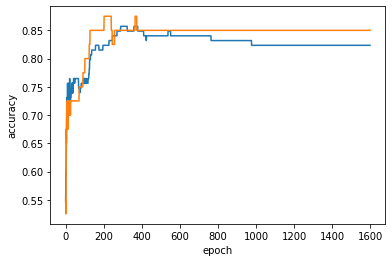

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=300, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8067226890756303
0.85


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.85
